In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [2]:
df = pd.DataFrame({"height":np.random.randint(150,180,10),"weight":np.random.randint(60,85,10)})

In [3]:
df

,height,weight
0,159,80
1,172,66
2,162,64
3,164,84
4,162,70
5,169,71
6,160,62
7,151,64
8,177,79
9,158,77


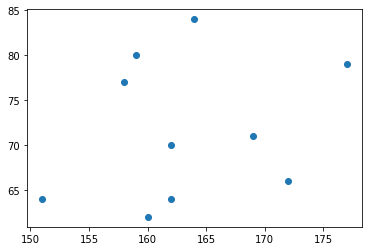

In [4]:
plt.scatter(df["height"],df["weight"]);

In [5]:
df=pd.read_csv("Advertising.csv",index_col=[0])

In [6]:
df

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


<AxesSubplot:>

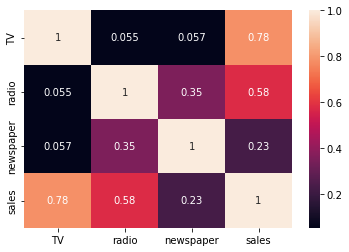

In [7]:
sns.heatmap(df.corr(),annot=True)

In [8]:
df.head(2)

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4


In [9]:
import pylab

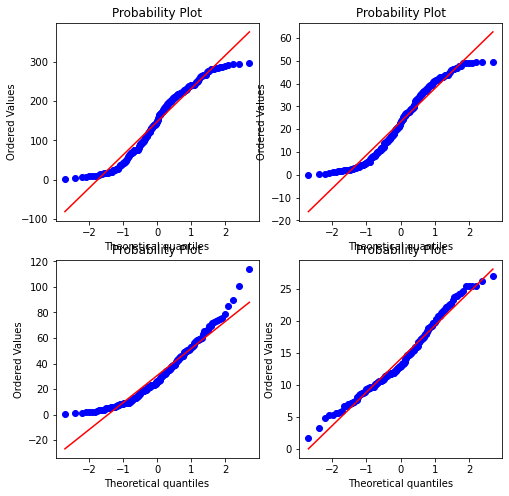

In [10]:
plt.figure(figsize=(8,8))
plot_num=1
for i in df.columns:
    if plot_num<5:
        plt.subplot(2,2,plot_num)
        st.probplot(df[i],dist="norm",plot=pylab);
        plot_num+=1

In [11]:
x=st.yeojohnson(df["TV"])

In [12]:
x[0]

array([72.55601218, 21.07257068, 10.09156689, 53.12562296, 60.62431523,
        5.85581073, 25.61524123, 44.67422836,  5.80113485, 65.31390421,
       28.47132164, 68.90907077, 13.01074958, 38.17637135, 66.35851488,
       64.23881375, 29.02402717, 84.26845705, 29.47646909, 52.02053398,
       69.79144274, 74.26199966,  8.18474899, 72.13316465, 27.22214521,
       80.11582206, 50.85384129, 74.88944216, 76.89862111, 29.92651412,
       86.81322505, 42.62309853, 38.08798311, 80.72659946, 37.6449571 ,
       86.32848149, 81.0200894 , 31.2312629 , 20.56399403, 72.06260426,
       65.97051036, 59.67104984, 86.96725874, 67.03558978, 13.5597702 ,
       59.19238796, 35.85413855, 74.84302934, 71.87432273, 28.73187726,
       65.31390421, 39.02713674, 69.31498138, 61.0740063 , 80.07051326,
       65.094514  ,  5.0757349 , 49.05883338, 67.97462731, 67.95060727,
       24.24916395, 79.75309487, 74.70372927, 39.69727944, 47.6768055 ,
       29.41198269, 16.16477165, 49.8921946 , 74.26199966, 69.41

In [13]:
a=st.boxcox(df["TV"])

In [14]:
a[0]

array([70.23046136, 20.323362  ,  9.49979658, 51.47616357, 58.721859  ,
        5.25169577, 24.76540516, 43.2953103 ,  5.19625066, 63.24793042,
       27.55181965, 66.71525453, 12.39466456, 36.99264232, 64.25560972,
       62.21066018, 28.09055528, 81.50721853, 28.53145135, 50.40739034,
       67.56593806, 71.87415127,  7.59680687, 69.82298969, 26.33365026,
       77.51113253, 49.27874687, 72.47857687, 74.41368188, 28.96991569,
       83.95499994, 41.30712447, 36.90681994, 78.09902179, 36.47661571,
       83.48879091, 78.38149643, 30.24056772, 19.82513185, 69.75499252,
       63.88134366, 57.80135628, 84.1031382 , 64.90865228, 12.93725079,
       57.33908232, 34.73694367, 72.43386855, 69.57354701, 27.80580827,
       63.24793042, 37.81858014, 67.10660266, 59.15603729, 77.4675197 ,
       63.03627373,  4.45835887, 47.54167578, 65.81423769, 65.79107508,
       23.43101681, 77.1619752 , 72.29968241, 38.46900318, 46.20373778,
       28.46861655, 15.50558215, 48.34823153, 71.87415127, 67.19

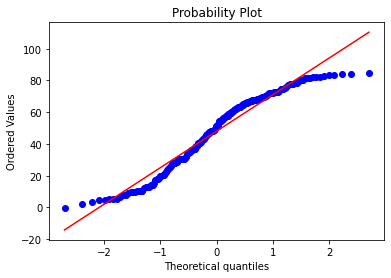

In [15]:
st.probplot(a[0],dist="norm",plot=pylab);

In [16]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

In [17]:
df.kurt()

TV          -1.226495
radio       -1.260401
newspaper    0.649502
sales       -0.408869
dtype: float64

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
x=df.drop(columns=["sales"])
y=df.sales

In [20]:
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.10,random_state=123)

In [23]:
x_train.shape

(180, 3)

In [24]:
x_test.shape

(20, 3)

In [25]:
y_train.shape

(180,)

In [26]:
y_test.shape

(20,)

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [29]:
lr.intercept_

2.858967994187882

In [30]:
lr.coef_

array([13.6687191 ,  9.33460805,  0.03203404])

In [31]:
y_pred=13.6687191*230.1+2.85
y_pred

3148.02226491

In [32]:
y_pred=9.33*37.8+2.85
y_pred

355.524

In [33]:
y_pred = lr.predict(x_test)

In [34]:
y_pred[0:5]

array([12.65543322,  6.53635939, 15.58937422,  9.75408713, 14.13876916])

In [35]:
y_test

51     11.4
128     8.8
38     14.7
150    10.1
20     14.6
105    20.7
180    12.6
54     21.2
163    14.9
159     7.3
83     11.3
186    22.6
183     8.7
190     6.7
109     5.3
32     11.9
5      12.9
179    11.8
122     7.0
21     18.0
Name: sales, dtype: float64

In [36]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score

In [37]:
r2_score(y_test,y_pred)

0.8914812795822676

In [38]:
mse = mean_squared_error(y_test,y_pred)
mse

2.551370070901253

In [39]:
np.sqrt(mse)

1.5973008705003742

In [40]:
mae = mean_absolute_error(y_test,y_pred)
mae

1.1961657263808894

In [41]:
mape = mean_absolute_percentage_error(y_test,y_pred)

In [42]:
mape

0.12215735370671128

In [43]:
len(x_test[:,0])

20

In [44]:
len(y_test)

20

In [45]:
len(y_pred)

20

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


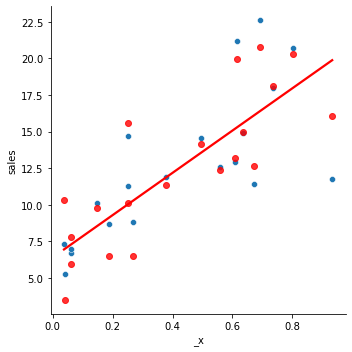

In [46]:
sns.relplot(x_test[:,0],y_test)
sns.regplot(x_test[:,0],y_pred,color = "red",ci = False)
plt.xticks()

plt.yticks()
plt.show();

In [47]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [48]:
lasso=Lasso()

In [49]:
lasso.fit(x_train,y_train)

Lasso()

In [50]:
y_pred_lasso=lasso.predict(x_test)

In [51]:
r2_score(y_test,y_pred_lasso)

0.09307621969671465

In [52]:
ridge=Ridge()

In [53]:
ridge.fit(x_train,y_train)

Ridge()

In [54]:
y_pred_ridge=ridge.predict(x_test)

In [55]:
r2_score(y_test,y_pred_ridge)

0.8949899523746727

In [56]:
ela=ElasticNet()

In [57]:
ela.fit(x_train,y_train)

ElasticNet()

In [58]:
y_pred_ela=ela.predict(x_test)

In [59]:
r2_score(y_test,y_pred_ela)

0.05945665700375491

In [60]:
from sklearn.linear_model import LassoCV,RidgeCV,ElasticNetCV

In [61]:
l1=LassoCV(cv=3)
l1.fit(x_train,y_train)

LassoCV(cv=3)

In [62]:
y_pred_l1=l1.predict(x_test)

In [63]:
r2_score(y_test,y_pred_l1)

0.8928241289890236

In [64]:
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm

In [65]:
ols=sm.OLS(y,x)

In [66]:
model=ols.fit()

In [67]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              3566.
Date:                Thu, 21 Jul 2022   Prob (F-statistic):                   2.43e-171
Time:                        14:18:44   Log-Likelihood:                         -423.54
No. Observations:                 200   AIC:                                      853.1
Df Residuals:                     197   BIC:                                      863.0
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0538      0.001     40.507      0.000       0.051       0.056
radio          0.2222      0.009     23.595      0.000       0.204       0.241
newspaper      0.0168      0.007      2.517      0.013       0.004       0.030
==============================================================================
Omnibus:                        5.982   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.050   Jarque-Bera (JB):                7.039
Skew:                          -0.232   Prob(JB):                       0.0296
Kurtosis:                       3.794   Cond. No.                         12.6
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
df=pd.read_csv("Admission_Prediction.csv")

In [70]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332.0,108.0,5.0,4.5,4.0,9.02,1,0.87
496,497,337.0,117.0,5.0,5.0,5.0,9.87,1,0.96
497,498,330.0,120.0,5.0,4.5,5.0,9.56,1,0.93
498,499,312.0,103.0,4.0,4.0,5.0,8.43,0,0.73


In [71]:
df.shape

(500, 9)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          485 non-null    float64
 2   TOEFL Score        490 non-null    float64
 3   University Rating  485 non-null    float64
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


In [73]:
df.isna().sum()

Serial No.            0
GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64